# Week 13 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Check in your data file along with this exercise. Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

*My Project is*
# Environmental Data and Public Health Correlation dashboard

Firstly I'm gonna upload the csv data file.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [37]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# Load the dataset into a DataFrame
file = 'Data_table_data.csv'  # Replace with the actual file path
Data_table_data = pd.read_csv(file)
# Display the number of rows and columns
print(f"The dataset has {Data_table_data.shape[0]} rows and {Data_table_data.shape[1]} columns.")
Data_table_data.head()# Shows the first 5 rows
Data_table_data

The dataset has 1440 rows and 11 columns.


,Iso3,Location Name,AMRO subregions,Causename Eng,Year,Sex,Age group,Measure Name En,Metric Name En,Measure Names,Measure Values
0,AMRO,Region of the Americas,Region of the Americas,Asthma,2019,Both sexes,Age-standardized,Deaths,Rate,Value Up,1.468666
1,AMRO,Region of the Americas,Region of the Americas,Asthma,2019,Both sexes,Age-standardized,Deaths,Rate,Value Low,0.688193
2,AMRO,Region of the Americas,Region of the Americas,Asthma,2019,Both sexes,Age-standardized,Deaths,Rate,Value,1.023703
3,AMRO,Region of the Americas,Region of the Americas,Asthma,2019,Both sexes,Age-standardized,Disability-Adjusted Life Years (DALYs),Rate,Value Up,437.516313
4,AMRO,Region of the Americas,Region of the Americas,Asthma,2019,Both sexes,Age-standardized,Disability-Adjusted Life Years (DALYs),Rate,Value Low,122.209372
...,...,...,...,...,...,...,...,...,...,...,...
1435,NLC,Non-Latin Caribbean,Region of the Americas,Respiratory diseases,2019,Female,All Ages,Years Lived with Disability (YLDs),Rate,Value Low,156.587767
1436,NLC,Non-Latin Caribbean,Region of the Americas,Respiratory diseases,2019,Female,All Ages,Years Lived with Disability (YLDs),Rate,Value,281.480557
1437,NLC,Non-Latin Caribbean,Region of the Americas,Respiratory diseases,2019,Female,All Ages,Years of Life Lost (YLLs),Rate,Value Up,481.311100
1438,NLC,Non-Latin Caribbean,Region of the Americas,Respiratory diseases,2019,Female,All Ages,Years of Life Lost (YLLs),Rate,Value Low,173.006037


So here I took one file out of 3 which is CSV for this step,dataset called "Data_table_data"

### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [72]:
# Count the number of unique values in each column
unique_values_count = Data_table_data.nunique()
# Find the column with the greatest number of distinct values
most_diverse_column = unique_values_count.idxmax()
most_diverse_count = unique_values_count.max()
# Sort the unique counts in descending order and get the second most diverse column
sorted_unique_counts = unique_values_count.sort_values(ascending=False)
second_most_diverse_column = sorted_unique_counts.index[1]
second_most_diverse_count = sorted_unique_counts.iloc[1]
# Print the results
print("\nColumn with the most diversity:")
print(f"{most_diverse_column} with {most_diverse_count} unique values")
print("\nColumn with the second most diversity:")
print(f"{second_most_diverse_column} with {second_most_diverse_count} unique values")
print("Unique values in each column:")
unique_values_count


Column with the most diversity:
Measure Values with 1440 unique values

Column with the second most diversity:
Iso3 with 5 unique values
Unique values in each column:


,0
Iso3,5
Location Name,5
AMRO subregions,1
Causename Eng,4
Year,1
Sex,3
Age group,2
Measure Name En,4
Metric Name En,1
Measure Names,3


In the uploaded file, the Column with the Greatest Diversity is Measure Values with 1440 and next Most Diverse Column is Iso3 with 5 unique values.

### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [39]:
# Identify columns with constant values
constant_columns = [col for col in Data_table_data.columns if Data_table_data[col].nunique() == 1]
# Create a DataFrame showing the constant columns and their values
constant_column_values = {col: Data_table_data[col].unique()[0] for col in constant_columns}
constant_column_values_df = pd.DataFrame(list(constant_column_values.items()), columns=["Column", "Constant Value"])
# Display the result
print(f"Columns with the same value for every row: {constant_columns}")
constant_column_values_df

Columns with the same value for every row: ['AMRO subregions', 'Year', 'Metric Name En']


,Column,Constant Value
0,AMRO subregions,Region of the Americas
1,Year,2019
2,Metric Name En,Rate


From my dataset Columns with the same value for every row are 'AMRO subregions', 'Year', 'Metric Name En'.

### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

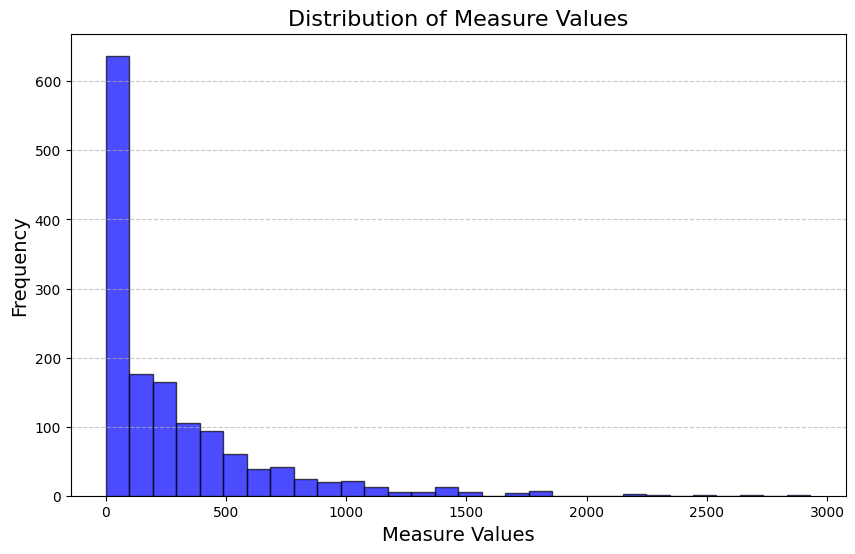

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
# Identify numeric columns in the dataset
numeric_columns = Data_table_data.select_dtypes(include=['float64', 'int64']).columns
# Choose a numeric column to visualize (for example, 'Measure Values')
column_to_plot = 'Measure Values' if 'Measure Values' in numeric_columns else numeric_columns[0]
# Create a histogram for the selected column
plt.figure(figsize=(10, 6))
plt.hist(Data_table_data[column_to_plot], bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title(f"Distribution of {column_to_plot}", fontsize=16)
plt.xlabel(column_to_plot, fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

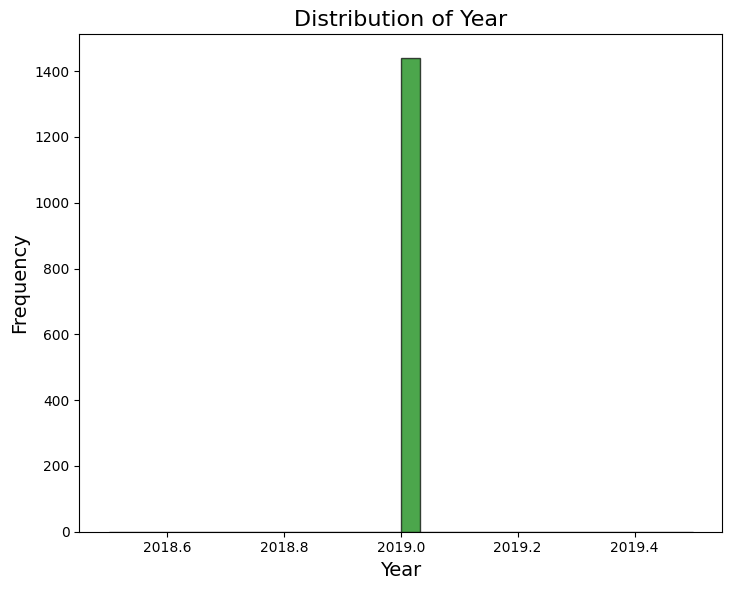

In [64]:
# Identify numeric columns in the dataset
numeric_columns = Data_table_data.select_dtypes(include=['float64', 'int64']).columns
# Check if there are at least two numeric columns
if len(numeric_columns) >= 2:
    column_to_plot_1 = numeric_columns[0]
    column_to_plot_2 = numeric_columns[1]
    # Create histograms for the two selected columns
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.hist(Data_table_data[column_to_plot_1], bins=30, color='green', alpha=0.7, edgecolor='black')
    plt.title(f"Distribution of {column_to_plot_1}", fontsize=16)
    plt.xlabel(column_to_plot_1, fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    # Show histogram
    plt.tight_layout()
    plt.show()
else:
    print("The dataset has fewer than two numeric columns for histogram visualization.")


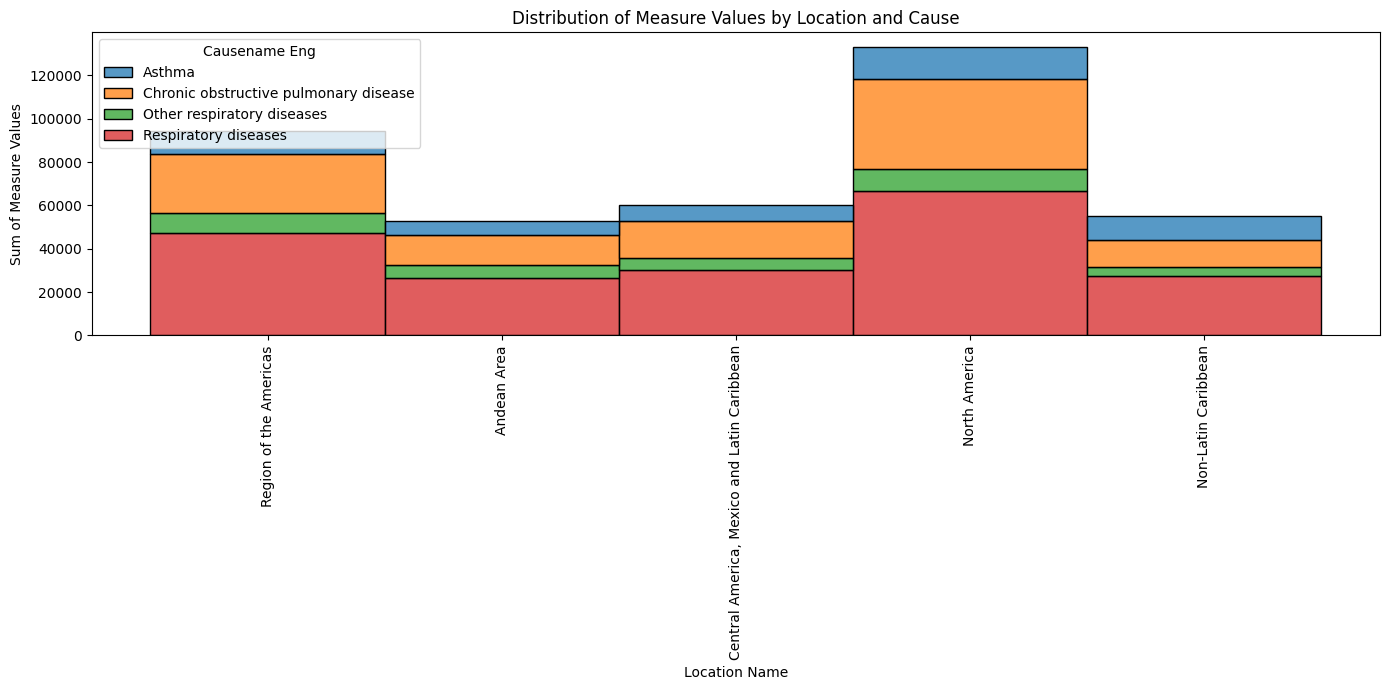

In [42]:
# Ensure 'Measure Values' column is numeric and drop invalid rows
Data_table_data['Measure Values'] = pd.to_numeric(Data_table_data['Measure Values'], errors='coerce')
valid_data = Data_table_data.dropna(subset=['Measure Values'])
# Plot histogram for "Location Name" vs. "Causename Eng"
plt.figure(figsize=(14, 7))
sns.histplot(
    data=valid_data,
    x='Location Name',
    hue='Causename Eng',
    weights='Measure Values',
    multiple='stack',
    kde=False
)
plt.xticks(rotation=90)
plt.title('Distribution of Measure Values by Location and Cause')
plt.xlabel('Location Name')
plt.ylabel('Sum of Measure Values')
plt.tight_layout()
plt.show()

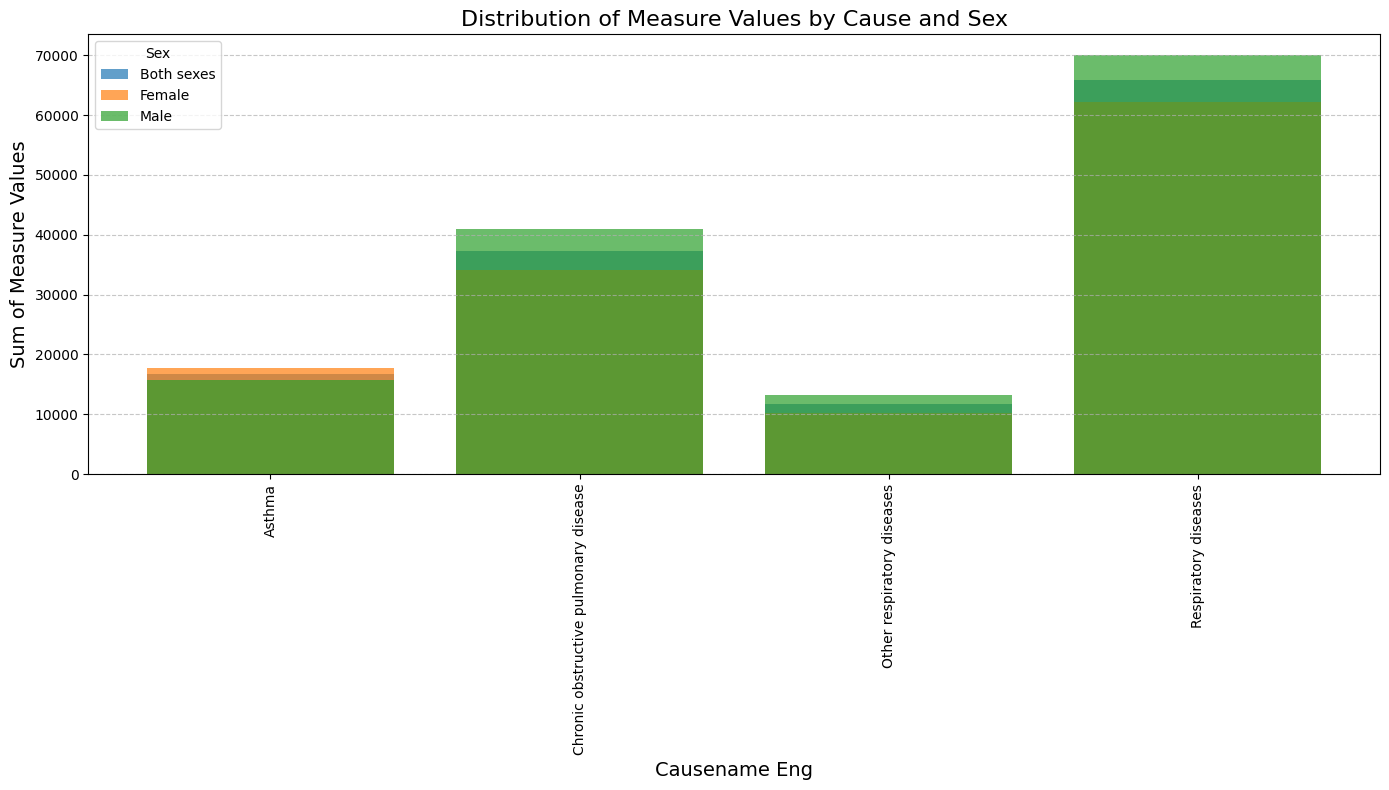

In [60]:
# Group data by 'Causename Eng' and 'Sex', summing 'Measure Values'
grouped_cause_sex = valid_data.groupby(['Causename Eng', 'Sex'])['Measure Values'].sum().reset_index()
# Creating histogram
plt.figure(figsize=(14, 8))
for sex in grouped_cause_sex['Sex'].unique():
    subset = grouped_cause_sex[grouped_cause_sex['Sex'] == sex]
    plt.bar(subset['Causename Eng'], subset['Measure Values'], alpha=0.7, label=sex)
plt.title("Distribution of Measure Values by Cause and Sex", fontsize=16)
plt.xlabel("Causename Eng", fontsize=14)
plt.ylabel("Sum of Measure Values", fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Sex")
plt.tight_layout()
plt.show()

In this step 4, I created 4 Histograms which are:

1. Distribution of Measure Values
2. Distribution of Years
3. Distribution of Measure Values by Locationname and Causename Eng
4. Distribution of Measure Values by Causename Eng and Sex

### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

=>  As an additional exploration of for my data, I did some visualizations & took average which includes:

1. Plotted regional distribution for the top cause.
2. Plotted sex-based trends for the specific cause.
3. Average Measure Values by Sex.
4. Scatterplot of Measure values by Year and Sex.
5. Pivot table to summarize average Measure Values by Location and Cause & Heatmap for pivot table.
6. Pie Chart: Proportion of Measure Values by Cause.
7. Boxplot: Distribution of Measure Values by Location

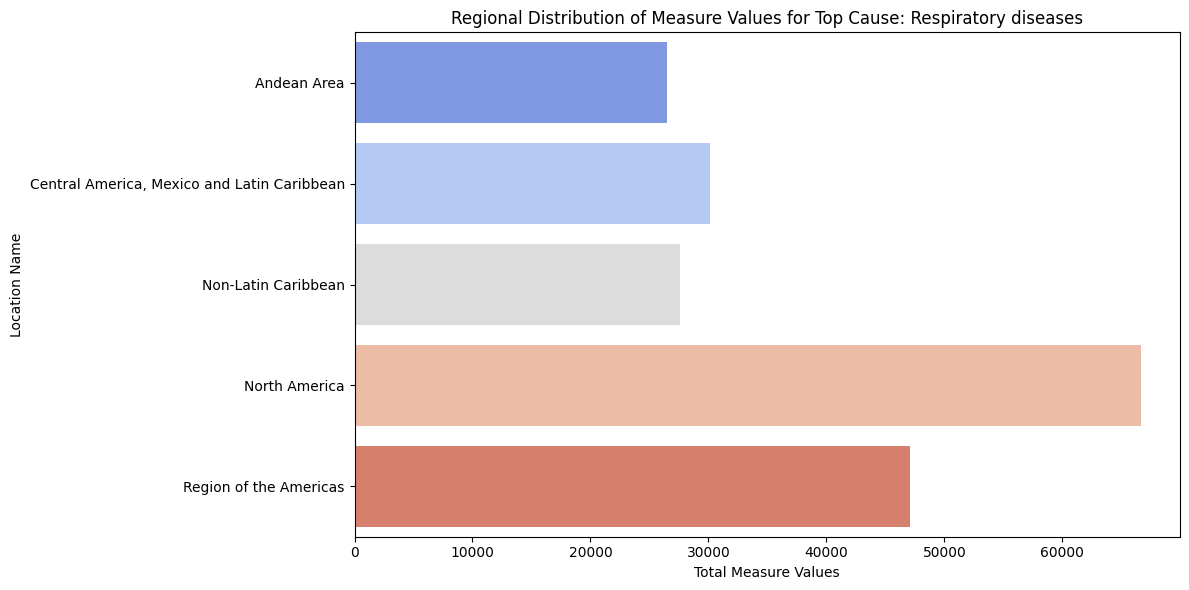


Top Cause: Respiratory diseases
Top Causes by Measure Values:


,Measure Values
Causename Eng,
Respiratory diseases,197944.252383
Chronic obstructive pulmonary disease,112402.385762
Asthma,50315.150521
Other respiratory diseases,35169.103910


In [71]:
# Top 5 Causes by Measure Values (overall)
top_causes = valid_data.groupby('Causename Eng')['Measure Values'].sum().sort_values(ascending=False).head(5)
# Regional Comparison for the top cause
top_cause_name = top_causes.idxmax()
regional_data = valid_data[valid_data['Causename Eng'] == top_cause_name].groupby('Location Name')['Measure Values'].sum()
# Plotting regional distribution for the top cause
plt.figure(figsize=(12, 6))
sns.barplot(x=regional_data.values, y=regional_data.index, palette="coolwarm")
plt.title(f'Regional Distribution of Measure Values for Top Cause: {top_cause_name}')
plt.xlabel('Total Measure Values')
plt.ylabel('Location Name')
plt.tight_layout()
plt.show()
print(f"\nTop Cause: {top_cause_name}")
print("Top Causes by Measure Values:")
top_causes

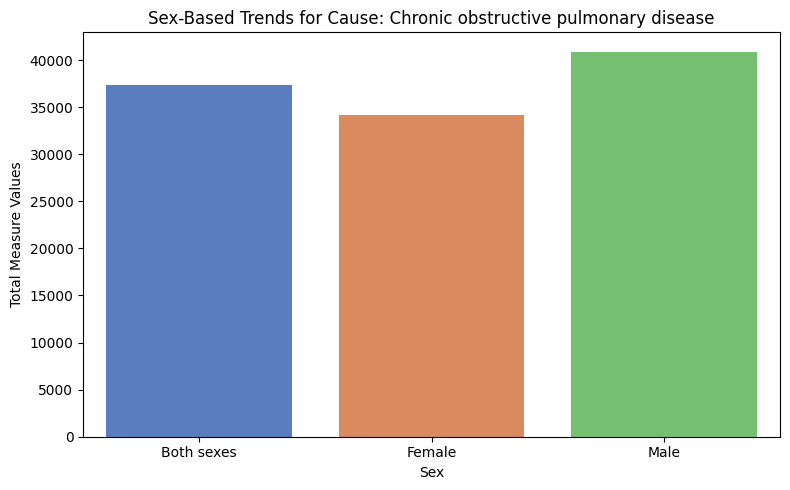


Top Cause: Respiratory diseases
Specific Cause (Second Top): Chronic obstructive pulmonary disease


In [68]:
# Sex-Based Trends for a Specific Cause (choose one from the top causes)
specific_cause_name = top_causes.index[1]  # Second top cause for variety
sex_based_data = valid_data[valid_data['Causename Eng'] == specific_cause_name].groupby('Sex')['Measure Values'].sum()
# Plotting sex-based trends for the specific cause
plt.figure(figsize=(8, 5))
sns.barplot(x=sex_based_data.index, y=sex_based_data.values, palette="muted")
plt.title(f'Sex-Based Trends for Cause: {specific_cause_name}')
plt.xlabel('Sex')
plt.ylabel('Total Measure Values')
plt.tight_layout()
plt.show()
print(f"\nTop Cause: {top_cause_name}")
print(f"Specific Cause (Second Top): {specific_cause_name}")

In [52]:
#Average Measure Values by Sex
gender_avg_values = valid_data.groupby('Sex')['Measure Values'].mean()
print("\nAverage Measure Values by Sex:\n")
gender_avg_values


Average Measure Values by Sex:



,Measure Values
Sex,
Both sexes,274.164506
Female,258.902450
Male,291.580736


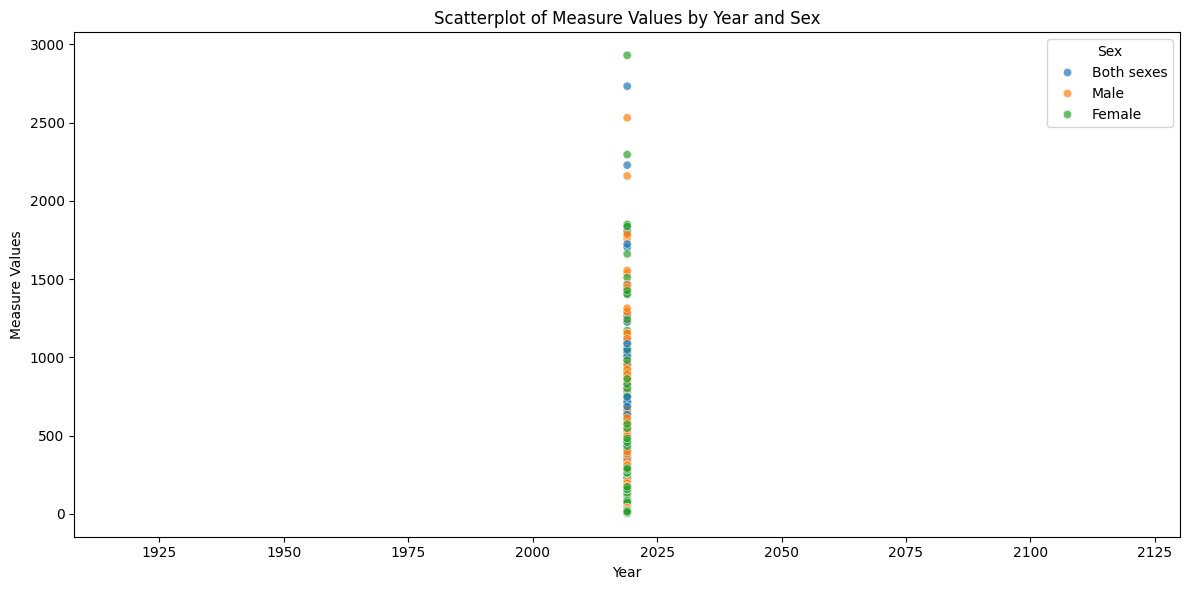

In [55]:
#Scatterplot: Plotting of Measure values by Year and Sex
plt.figure(figsize=(12, 6))
sns.scatterplot(data=valid_data, x='Year', y='Measure Values', hue='Sex', alpha=0.7)
plt.title('Scatterplot of Measure Values by Year and Sex')
plt.xlabel('Year')
plt.ylabel('Measure Values')
plt.legend(title='Sex')
plt.tight_layout()
plt.show()

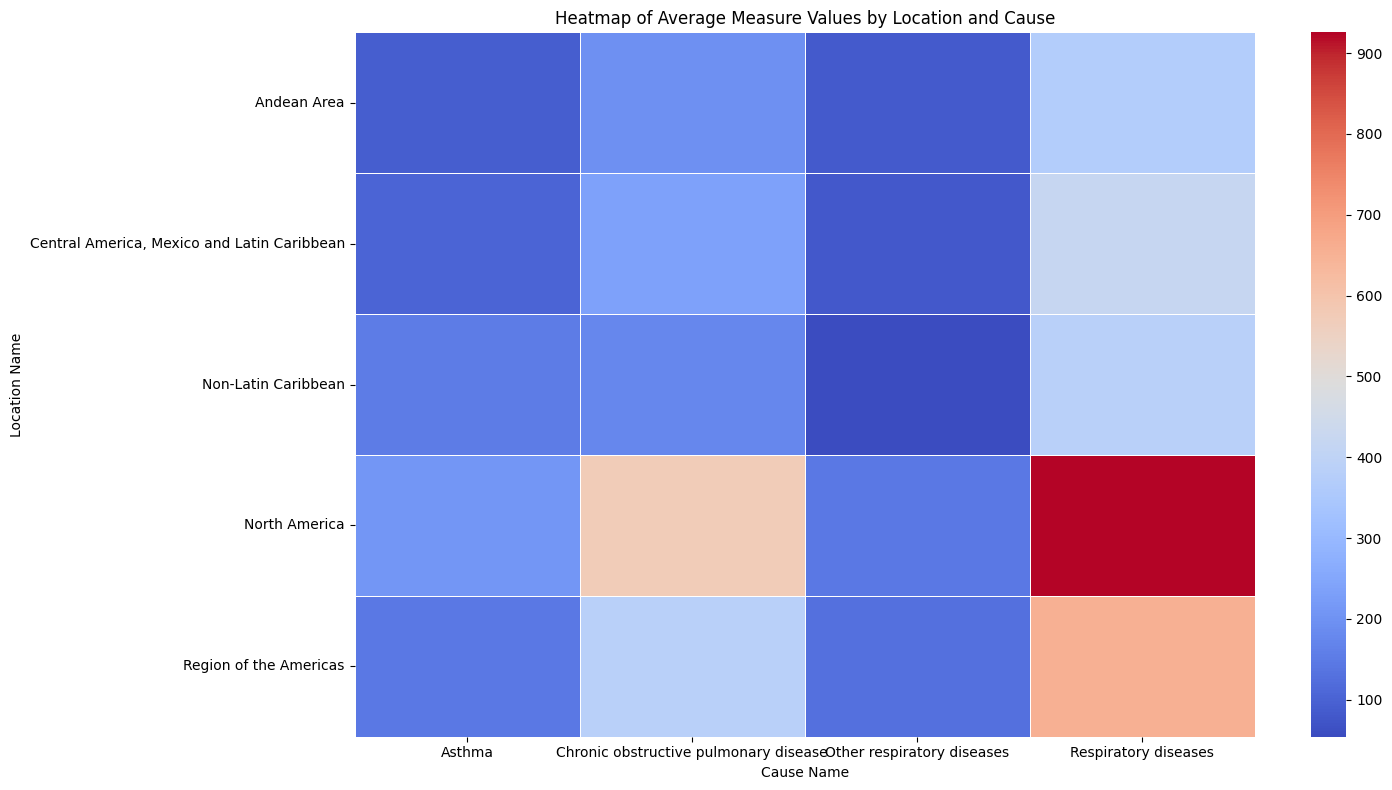

Pivot Table (Average Measure Values by Location and Cause):



Causename Eng,Asthma,Chronic obstructive pulmonary disease,Other respiratory diseases,Respiratory diseases
Location Name,,,,
Andean Area,89.227155,195.613579,83.156194,367.540180
"Central America, Mexico and Latin Caribbean",104.274925,234.772022,79.857224,418.946529
Non-Latin Caribbean,152.471069,176.137299,54.361755,382.696660
North America,209.016858,572.463824,143.260720,925.630530
Region of the Americas,143.831528,382.157522,127.823883,654.411829


In [69]:
# Pivot table to summarize average Measure Values by Location and Cause
pivot_table = valid_data.pivot_table(
    index='Location Name',
    columns='Causename Eng',
    values='Measure Values',
    aggfunc='mean'
)
# Heatmap for pivot table
plt.figure(figsize=(15, 8))
sns.heatmap(pivot_table, cmap='coolwarm', annot=False, cbar=True, linewidths=0.5)
plt.title('Heatmap of Average Measure Values by Location and Cause')
plt.xlabel('Cause Name')
plt.ylabel('Location Name')
plt.tight_layout()
plt.show()
print("Pivot Table (Average Measure Values by Location and Cause):\n")
pivot_table

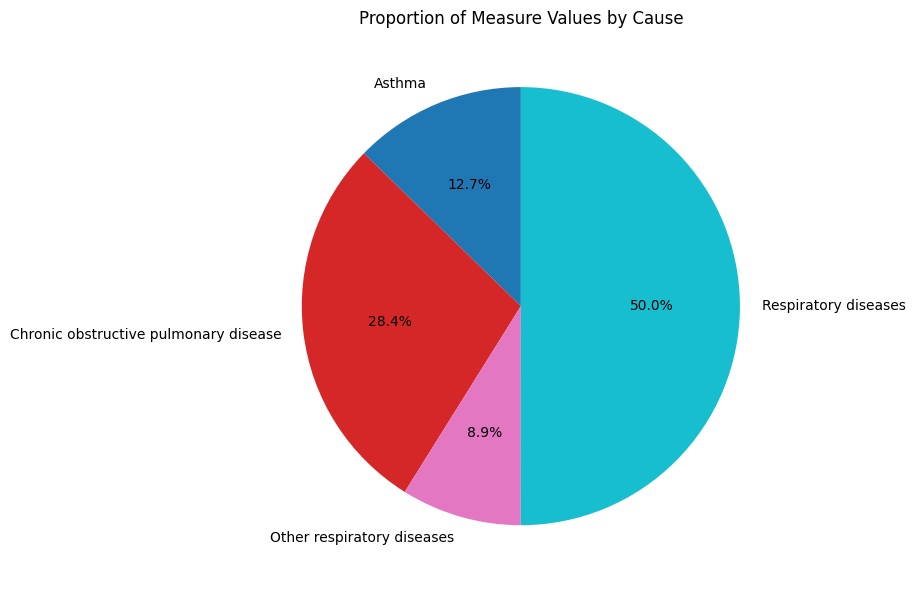

In [66]:
# Pie Chart: Proportion of Measure Values by Cause
plt.figure(figsize=(10, 6))
Data_table_data.groupby("Causename Eng")["Measure Values"].sum().plot(
    kind="pie", autopct="%1.1f%%", startangle=90, colormap="tab10"
)
plt.title("Proportion of Measure Values by Cause")
plt.ylabel("")  # Hide y-label for better visualization
plt.tight_layout()
plt.show()

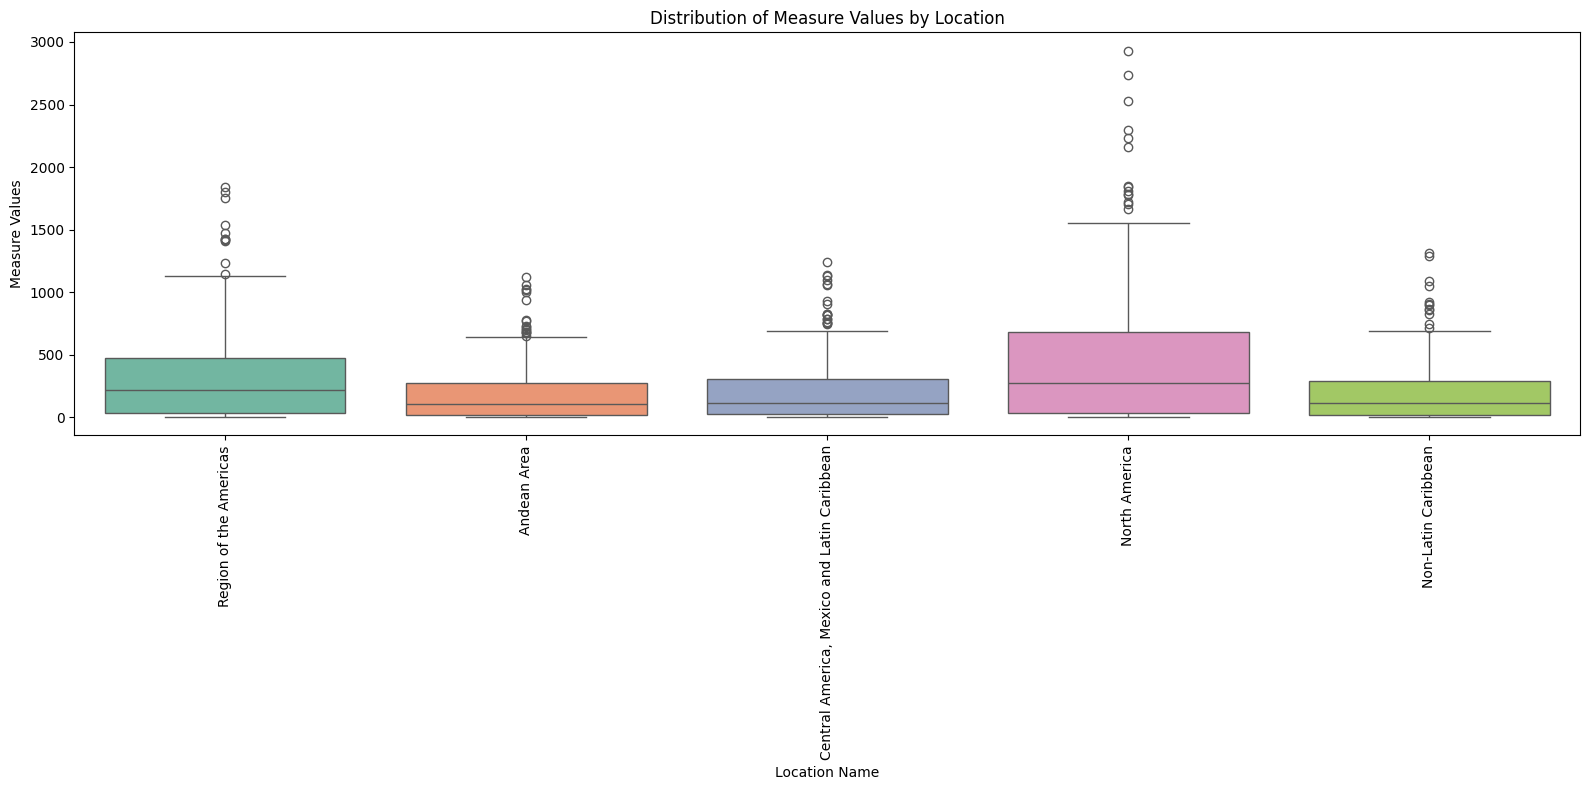

In [63]:
# Boxplot: Distribution of Measure Values by Location
plt.figure(figsize=(16, 8))
sns.boxplot(data=Data_table_data, x="Location Name", y="Measure Values", palette="Set2")
plt.title("Distribution of Measure Values by Location")
plt.xlabel("Location Name")
plt.ylabel("Measure Values")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()



---



## Submitting Your Work

Submit your work as usual.